### Robust loss function

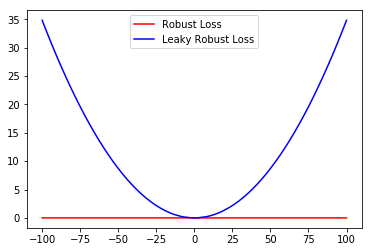

In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

residuals = tf.placeholder(dtype=tf.float32,shape=[None,1])

median = tf.contrib.distributions.percentile(residuals, 50.0)
temp = tf.abs(residuals-median)
weight = 100
mad = tf.contrib.distributions.percentile(temp, 50.0)*weight
b = 1.4826 # 1.4826
r_mad = residuals/b/mad
c = 4.6851 # 4.6851
condition = tf.less(tf.abs(r_mad),c)
robust_loss = tf.where(condition,
                       c*c/6*(1-tf.pow((1-tf.pow(r_mad/c,2)),3)),
                       c*c/6*tf.ones_like(r_mad))
leaky_rate = 0.01
leaky_robust_loss = weight*weight*tf.where(condition,
                             c*c/6*(1-tf.pow((1-tf.pow(r_mad/c,2)),3)),
                             leaky_rate*(tf.abs(r_mad)-c)**2 + c*c/6)

# 
max_val = 10.0
residuals_val = np.linspace(start=-max_val/10,stop=max_val/10,num=100).reshape((-1,1))
residuals_val = np.concatenate((residuals_val,np.linspace(start=-max_val,stop=-max_val/10,num=30).reshape((-1,1))),axis=0)
residuals_val = np.concatenate((residuals_val,np.linspace(start=max_val/10,stop=max_val,num=30).reshape((-1,1))),axis=0)
residuals_val = np.sort(residuals_val,axis=0)
residuals_val = residuals_val 

sess = tf.Session()
robust_loss_val = sess.run(robust_loss,feed_dict={residuals:residuals_val})
leaky_robust_loss_val = sess.run(leaky_robust_loss,feed_dict={residuals:residuals_val})

h_r,=plt.plot(residuals_val,robust_loss_val,'r')
h_lr,=plt.plot(residuals_val,leaky_robust_loss_val,'b')
plt.legend([h_r,h_lr],['Robust Loss','Leaky Robust Loss'])
plt.show()